In [9]:
import numpy
from keras import optimizers
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.models import load_model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
import tensorflow as tf
tf.set_random_seed(seed)

In [10]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [11]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [12]:
X_train = X_train / 255
X_test = X_test / 255

In [13]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [14]:
def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    print model.summary()
    return model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
None
Train on 48000 samples, validate on 12000 samples
Epoch 1/30
12s - loss: 0.3112 - acc: 0.9116 - val_loss: 0.1548 - val_acc: 0.9572
Epoch 2/30
11s - loss: 0.1240 - acc: 0.9648 - val_loss: 0.1190 - val_acc: 0.9650
Epoch 3/30
11s - loss: 0.0825 - acc: 0.9763 - val_loss: 0.1059 - val_acc: 0.9669
Epoch 4/30
11s - loss: 0.0564 - acc: 0.9835 - val_loss: 0.0834 - val_acc: 0.9756
Epoch 5/30
11s - loss: 0.0400 - acc: 0.9891 - val_loss: 0.0758 - val_acc: 0.9769
Epoch 6/30
14s - loss: 0.0294 - acc: 0.9925 - val_loss: 0.0729 - val_acc

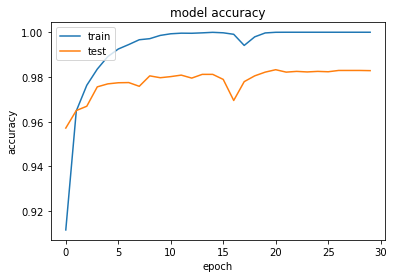

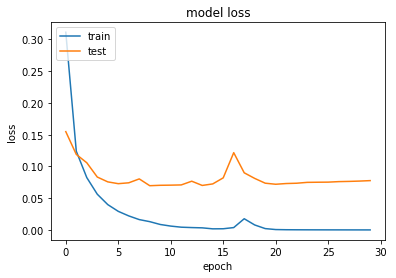

In [15]:
model = baseline_model()
# Fit the model
history=model.fit(X_train, y_train, validation_split=0.20, epochs=30, batch_size=200, verbose=2)
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [7]:
model=load_model('model_adam_30.h5')

In [8]:
loss,accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (accuracy*100))

Accuracy: 98.35%
